1. 基于T-R-train.csv数据，建立线性回归模型，计算其在T-R-test.csv数据上的r2分数，可视化模型预测结果
2. 加入多项式特征（2次、5次），建立回归模型
3. 计算多项式回归模型对测试数据进行预测的r2分数，判断哪个模型预测更准确
4. 可视化多项式回归模型数据预测结果，判断哪个模型预测更准确


In [3]:
# Load the data
import pandas as pd
import numpy as np

data_train = pd.read_csv('T-R-train.csv')
data_train.head()

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


In [4]:
# Define x and y
x_train = data_train.loc[:, 'T']
y_train = data_train.loc[:, 'rate']


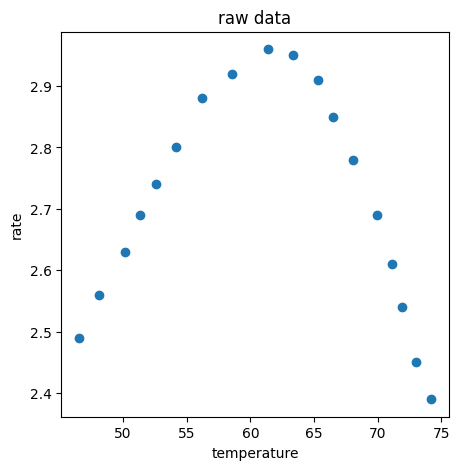

In [5]:
# Visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5, 5))
plt.scatter(x_train, y_train)
plt.title('raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [6]:
x_train = np.array(x_train).reshape(-1, 1)

In [7]:
# Linear regression
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
data_test = pd.read_csv('T-R-test.csv')
# Define x_test and y_test
x_test = data_test.loc[:, 'T']
y_test = data_test.loc[:, 'rate']
x_test = np.array(x_test).reshape(-1, 1)

In [13]:
# Make predictions
y_train_predict = lr1.predict(x_train)
y_test_predict = lr1.predict(x_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

print(f'r2_train: {r2_train:.3f}, r2_test: {r2_test:.3f}')

r2_train: 0.017, r2_test: -0.758


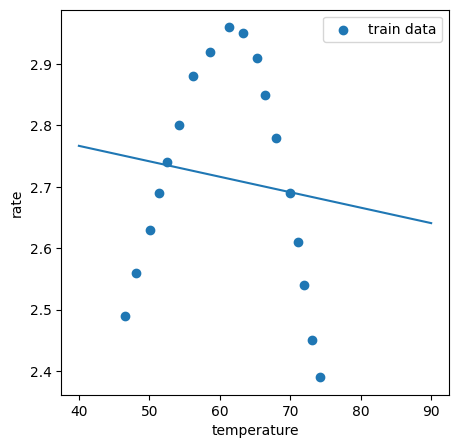

In [15]:
# Generate new data
x_range = np.linspace(40, 90, 300).reshape(-1, 1)
y_range_predict = lr1.predict(x_range)

fig2 = plt.figure(figsize=(5, 5))
plt.plot(x_range, y_range_predict)
plt.scatter(x_train, y_train, label='train data')
plt.ylabel('rate')
plt.xlabel('temperature')
plt.legend()
plt.show()

In [18]:
# 多项式回归
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
x_2_train = poly2.fit_transform(x_train)
x_2_test = poly2.fit_transform(x_test)

poly5 = PolynomialFeatures(degree=5)
x_5_train = poly5.fit_transform(x_train)
x_5_test = poly5.fit_transform(x_test)

print(f'x_2_train shape: {x_2_train.shape}, x_5_train shape: {x_5_train.shape}')

x_2_train shape: (18, 3), x_5_train shape: (18, 6)


In [19]:
lr2 = LinearRegression()
lr2.fit(x_2_train, y_train)
y_2_train_predict = lr2.predict(x_2_train)
y_2_test_predict = lr2.predict(x_2_test)

r2_2_train = r2_score(y_train, y_2_train_predict)
r2_2_test = r2_score(y_test, y_2_test_predict)

lr5 = LinearRegression()
lr5.fit(x_5_train, y_train)
y_5_train_predict = lr5.predict(x_5_train)
y_5_test_predict = lr5.predict(x_5_test)
r2_5_train = r2_score(y_train, y_5_train_predict)
r2_5_test = r2_score(y_test, y_5_test_predict)
print(f'r2_2_train: {r2_2_train:.3f}, r2_2_test: {r2_2_test:.3f}')
print(f'r2_5_train: {r2_5_train:.3f}, r2_5_test: {r2_5_test:.3f}')

r2_2_train: 0.970, r2_2_test: 0.996
r2_5_train: 0.998, r2_5_test: 0.544


In [21]:
#生成新数据
X_2_range = np.linspace(40,90,300).reshape(-1,1)
X_2_range = poly2.transform(X_2_range)
y_2_range_predict = lr2.predict(X_2_range)

X_5_range = np.linspace(40,90,300).reshape(-1,1)
X_5_range = poly5.transform(X_5_range)
y_5_range_predict = lr5.predict(X_5_range)


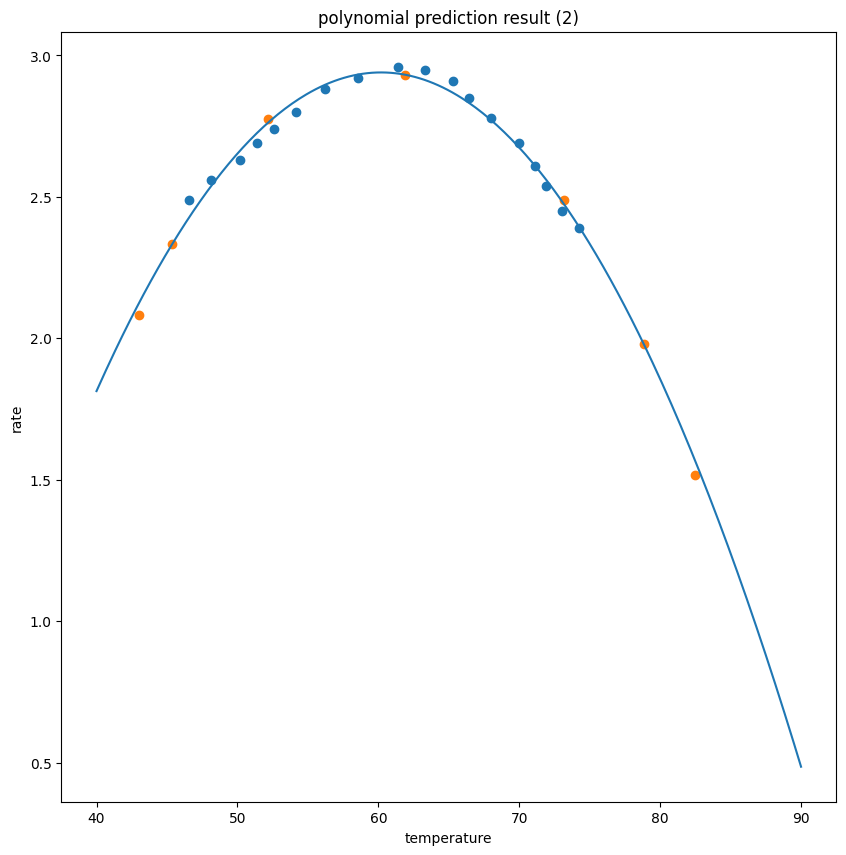

In [22]:
#可视化数据
fig3 = plt.figure(figsize=(10,10))
plt.plot(x_range,y_2_range_predict)#这里画图用X_range是因为X_2_range和X_5_range的维度过高，无法将图形展示出来。
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

plt.title('polynomial prediction result (2)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()


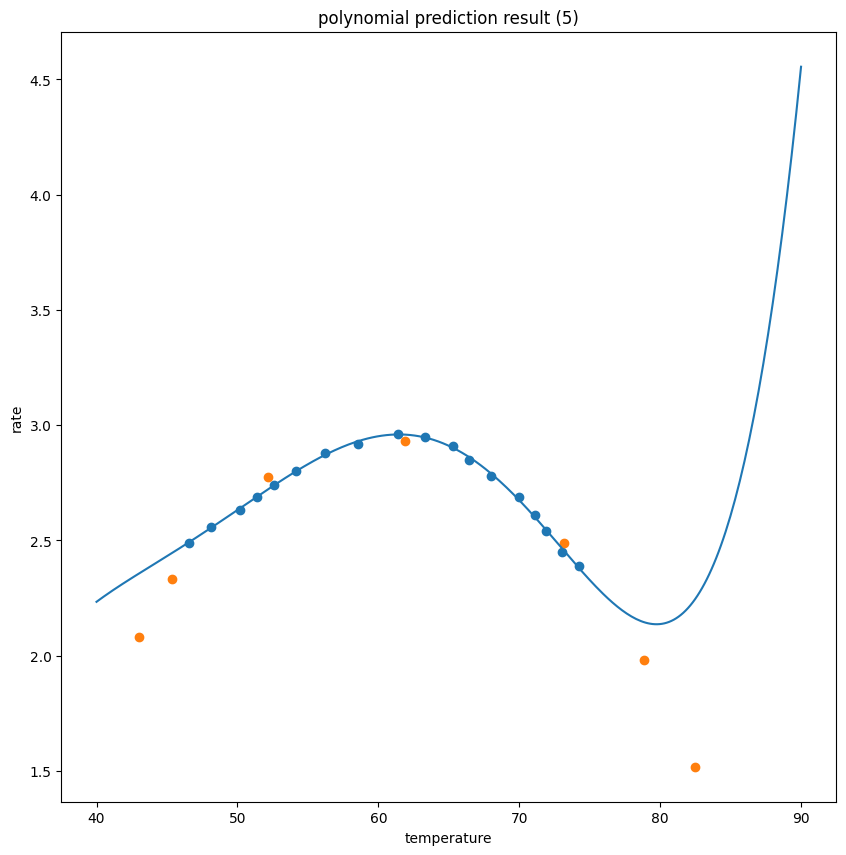

In [23]:
fig4 = plt.figure(figsize=(10,10))
plt.plot(x_range,y_5_range_predict)
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

plt.title('polynomial prediction result (5)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()
